# Problem Statement - Predicting fraudulent transactions.

## Importing necessary packages

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


## Reading the DataFrame

In [32]:
# Using read_json function from pandas to open a json file
# Using lines=True to avoid trailing lines error
df = pd.read_json("/content/fraud_transactions.json", lines=True)
df

,TransactionID,Amount,TransactionType,IsInternational,CardHolderAge,FraudReported
0,30001,36.25,Online,No,30,Yes
1,30002,589.92,Online,No,45,Yes
2,30003,940.83,Online,Yes,66,No
3,30004,579.72,ATM,Yes,42,No
4,30005,394.29,Online,Yes,50,Yes
5,30006,646.86,ATM,No,55,No
6,30007,463.67,POS,Yes,23,Yes
7,30008,550.16,ATM,No,61,Yes
8,30009,942.05,ATM,No,62,Yes
9,30010,392.24,POS,Yes,49,Yes


In [33]:
# Removing unnecessary columns
df = df.drop(columns = ["TransactionID"])
df.head()


,Amount,TransactionType,IsInternational,CardHolderAge,FraudReported
0,36.25,Online,No,30,Yes
1,589.92,Online,No,45,Yes
2,940.83,Online,Yes,66,No
3,579.72,ATM,Yes,42,No
4,394.29,Online,Yes,50,Yes


In [34]:
df.describe()

,Amount,CardHolderAge
count,50.000000,50.000000
mean,543.004000,42.640000
std,309.321324,13.707975
min,28.040000,18.000000
25%,298.355000,31.250000
50%,584.820000,42.500000
75%,814.432500,53.000000
max,990.600000,67.000000


## EDA

In [35]:
# Checking for null values
df.isnull().sum()

,0
Amount,0
TransactionType,0
IsInternational,0
CardHolderAge,0
FraudReported,0


In [36]:
df.head()

,Amount,TransactionType,IsInternational,CardHolderAge,FraudReported
0,36.25,Online,No,30,Yes
1,589.92,Online,No,45,Yes
2,940.83,Online,Yes,66,No
3,579.72,ATM,Yes,42,No
4,394.29,Online,Yes,50,Yes


Text(70.72222222222221, 0.5, 'FraudReported')

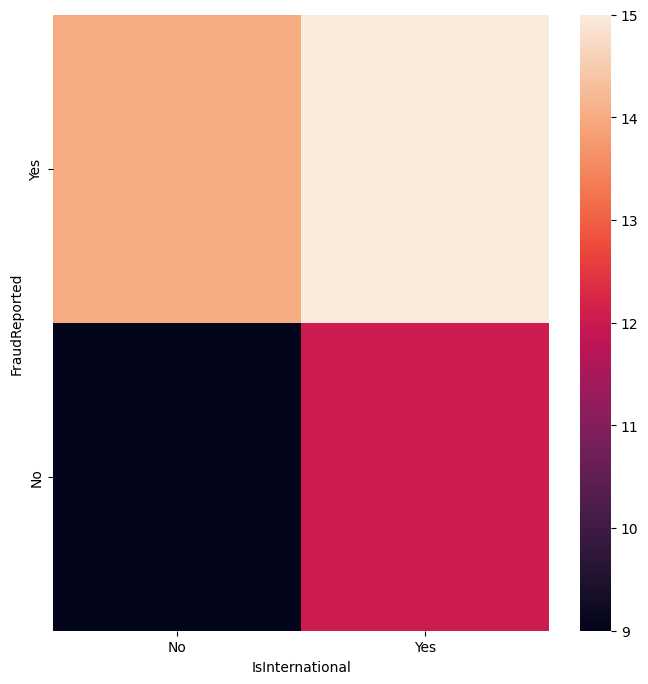

In [37]:
# Plotting a heatmap between IsInternational and FraudReported
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['FraudReported'].value_counts()
    for x_label, grp in df.groupby('IsInternational')
})
sns.heatmap(df_2dhist)
plt.xlabel('IsInternational')
plt.ylabel('FraudReported')

The above graph states that the number of fradulent transactions which are international are more as compared to fradulent transactions which are non-international.

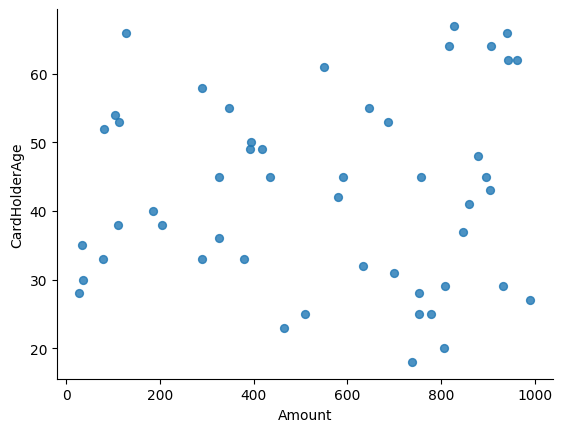

In [38]:
df.plot(kind='scatter', x='Amount', y='CardHolderAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
less_than_30df = df[df["CardHolderAge"]<30]
greater_than_60df = df[df["CardHolderAge"]>60]
new_df = df[(df["CardHolderAge"]>30) & (df["CardHolderAge"]<60)]

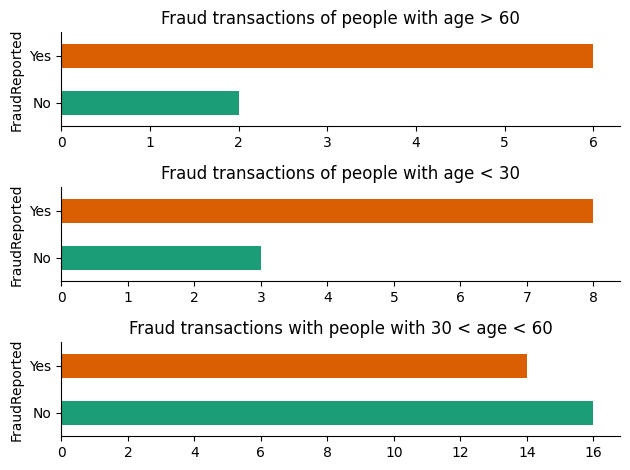

In [40]:
# Plotting fraud reports for all age groups

fig, axes = plt.subplots(3, 1)

greater_than_60df.groupby('FraudReported').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0])
axes[0].spines[['top', 'right',]].set_visible(False)
axes[0].set_title("Fraud transactions of people with age > 60")

less_than_30df.groupby('FraudReported').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1])
axes[1].spines[['top', 'right',]].set_visible(False)
axes[1].set_title("Fraud transactions of people with age < 30")

new_df.groupby('FraudReported').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[2])
axes[2].spines[['top', 'right',]].set_visible(False)
axes[2].set_title("Fraud transactions with people with 30 < age < 60")

plt.tight_layout()
plt.show()

Above findings state that almost 90% people with age<30 and age>60 have been targeted with frauds. On the other hand people with age range 30-60 have not been targeted much.

Text(0.5, 1.0, 'International transactions.')

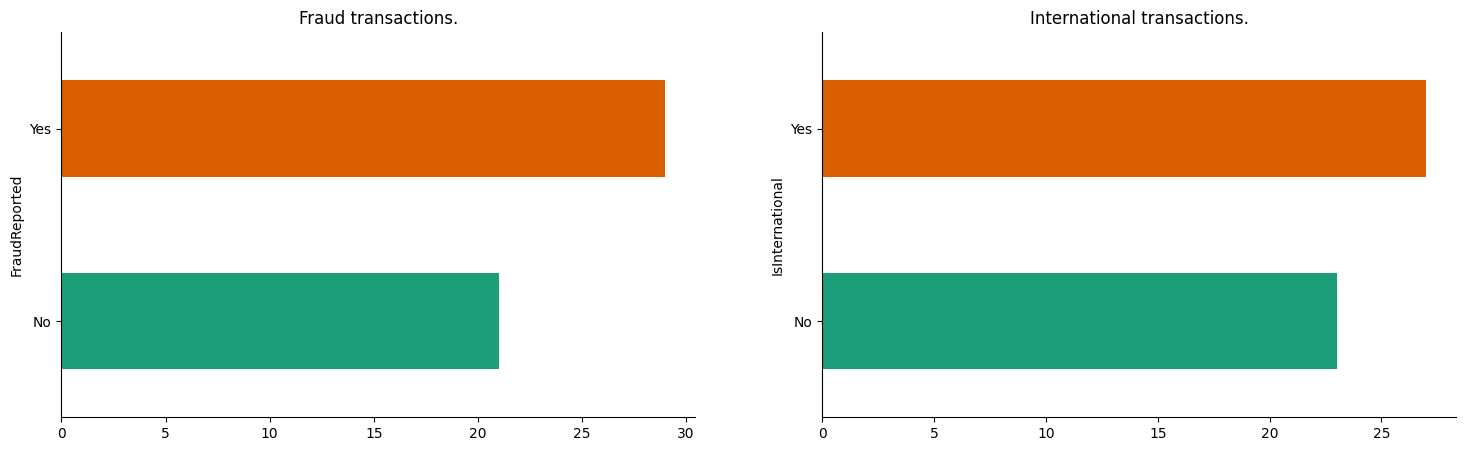

In [41]:
fig, axes = plt.subplots(1, 2, figsize = (18,5))

df.groupby('FraudReported').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0])
axes[0].spines[['top', 'right',]].set_visible(False)
axes[0].set_title("Fraud transactions.")

df.groupby('IsInternational').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1])
axes[1].spines[['top', 'right',]].set_visible(False)
axes[1].set_title("International transactions.")

In [42]:
df["IsInternational"].value_counts()

,count
IsInternational,
Yes,27
No,23


In [43]:
df["FraudReported"].value_counts()

,count
FraudReported,
Yes,29
No,21


Above graphs show total number of fraud, non-fraud, international and non-international transactions.

Fraud - 29

Not-fraud - 21

International - 27

Non-international(Domestic) - 23

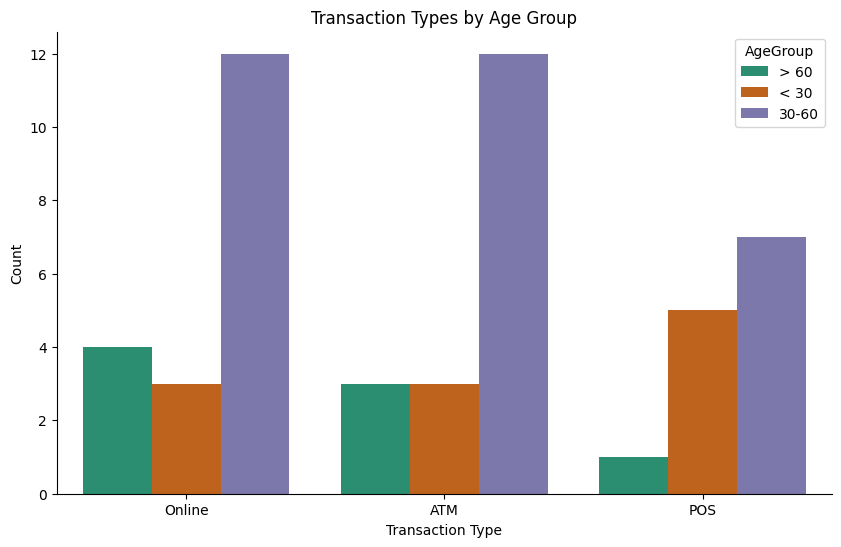

In [44]:
# Checking which transaction type is used by a particular age group
greater_than_60df = df[df["CardHolderAge"] > 60].copy()
less_than_30df = df[df["CardHolderAge"] < 30].copy()
new_df = df[(df["CardHolderAge"] >= 30) & (df["CardHolderAge"] <= 60)].copy()

greater_than_60df['AgeGroup'] = '> 60'
less_than_30df['AgeGroup'] = '< 30'
new_df['AgeGroup'] = '30-60'

combined_df = pd.concat([greater_than_60df, less_than_30df, new_df])

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='TransactionType', hue='AgeGroup', palette='Dark2')
plt.title('Transaction Types by Age Group')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

From the above graph we can infer that people from age 30-60 use POS lesser as compared to ATM and Online. A mixed choice of transaction is found for people with age > 60 and age < 30.

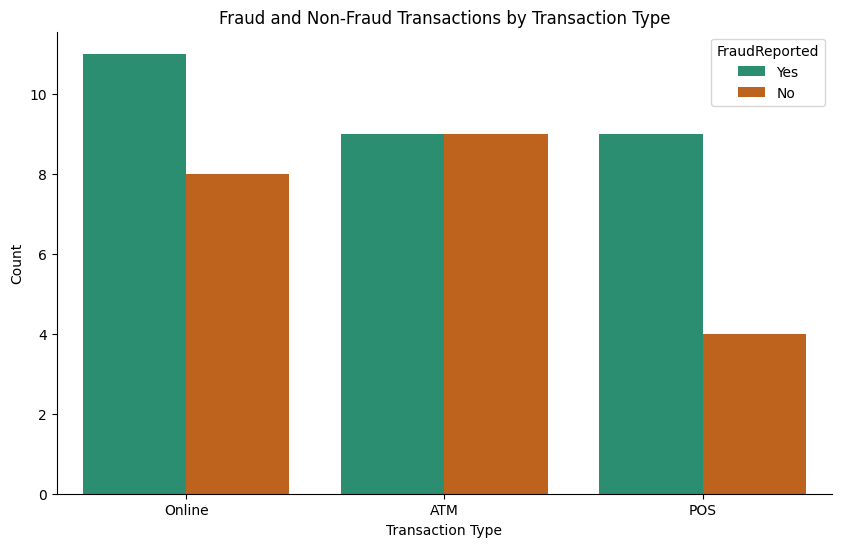

In [45]:
# Checking for fraud and non-fraud transactions in each transaction type

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TransactionType', hue='FraudReported', palette='Dark2')
plt.title('Fraud and Non-Fraud Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

Above graph shows that chances of fraud are highest in online and equal in POS and ATM type transactions.

In [46]:
df.size

250

In [47]:
fraud_amount_df = df[df["FraudReported"]=="Yes"]
not_fraud_df = df[df["FraudReported"]=="No"]
print("Total amount in fraud transactions: ",fraud_amount_df["Amount"].sum())
print("Total amount in non-fraud transactions: ",not_fraud_df["Amount"].sum())

Total amount in fraud transactions:  15709.610000000002
Total amount in non-fraud transactions:  11440.59


## Data Transformation

In [48]:
df.describe()
# print(df["Amount"].min())
# print(df["Amount"].max())


,Amount,CardHolderAge
count,50.000000,50.000000
mean,543.004000,42.640000
std,309.321324,13.707975
min,28.040000,18.000000
25%,298.355000,31.250000
50%,584.820000,42.500000
75%,814.432500,53.000000
max,990.600000,67.000000


In [49]:
cat_col = df.describe(include="O").columns
str_list = cat_col.tolist()
str_list

['TransactionType', 'IsInternational', 'FraudReported']

In [50]:
# Performing label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
df.head()

,Amount,TransactionType,IsInternational,CardHolderAge,FraudReported
0,36.25,Online,No,30,Yes
1,589.92,Online,No,45,Yes
2,940.83,Online,Yes,66,No
3,579.72,ATM,Yes,42,No
4,394.29,Online,Yes,50,Yes


In [52]:
df["TransactionType"] = le.fit_transform(df["TransactionType"])
df["IsInternational"] = le.fit_transform(df["IsInternational"])
df["FraudReported"] = le.fit_transform(df["FraudReported"])
df.head()

,Amount,TransactionType,IsInternational,CardHolderAge,FraudReported
0,36.25,1,0,30,1
1,589.92,1,0,45,1
2,940.83,1,1,66,0
3,579.72,0,1,42,0
4,394.29,1,1,50,1


1 - Online

0 - ATM

2 - POS

In [53]:
# Plotting correlation of other features with FraudReported
corr_with_fraud = df.corr()['FraudReported'].sort_values(ascending=False)
print(corr_with_fraud)


FraudReported      1.000000
TransactionType    0.150461
CardHolderAge      0.034161
Amount            -0.004963
IsInternational   -0.053661
Name: FraudReported, dtype: float64


The highest influence among these is TransactionType, meaning the type of transaction might be the most relevant factor — e.g., online or POS transactions could be more risky.

The weak overall correlations suggest that fraud behavior is nonlinear or multifactorial — likely depending on combinations of features (type + amount + international + age).

## Splitting data into training and testing.

In [54]:
y = df['FraudReported']
X = df.drop('FraudReported', axis=1)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.20, random_state = 42, stratify = df['FraudReported'])

## Model training

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight = "balanced")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

## Model Evaluation

In [57]:
acc = accuracy_score(y_test, y_predict)
print(f"Accuracy: {acc}")

Accuracy: 0.7


In [58]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.8
Recall: 0.6666666666666666
F1-score: 0.7272727272727273


In [59]:
y_predict

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [60]:
print(y_test==y_predict)

31     True
37     True
46    False
17     True
18     True
35    False
0      True
1     False
27     True
47     True
Name: FraudReported, dtype: bool
